In [1]:
# TODO: Add import statements
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv("data.csv")
X = train_data['Var_X'].values.reshape((-1, 1))
y = train_data['Var_Y'].values

In [3]:
print(X.shape)
print(y.shape)

(20, 1)
(20,)


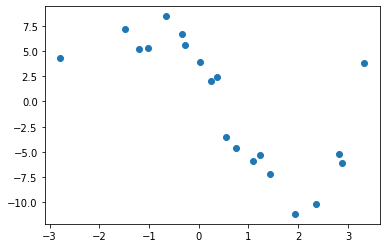

In [4]:
plt.scatter(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Linear Regression

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.6836978038444976


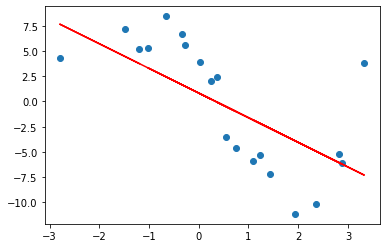

In [7]:
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.scatter(X, y)
plt.show()

## Polynomial Regression

In [20]:
# Find best degree
for d in range(1, 5):
  poly_feat = PolynomialFeatures(degree = d)
  X_train_poly = poly_feat.fit_transform(X_train)
  X_test_poly = poly_feat.fit_transform(X_test)
  
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  y_pred_poly = lr.predict(X_test_poly)
  print('Degree %i: %f' % (d, r2_score(y_test, y_pred_poly)))

print('Note: R2score determines how similar the real y labels and the predicted y labels')

Degree 1: 0.683698
Degree 2: 0.692843
Degree 3: 0.924977
Degree 4: 0.917582
Note: R2score determines how similar the real y labels and the predicted y labels


## Model with optimal degree

In [9]:
# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the predictor feature
poly_feat = PolynomialFeatures(degree = 3)
X_poly = poly_feat.fit_transform(X)

In [10]:
X_poly.shape

(20, 4)

In [11]:
# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression().fit(X_poly, y)